<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: Data Analysis Final Project</h1>
<h3>Applications of linear regression, FFT and EOF on various data</h3>

<hr style="height:2px;">

### Author: Wei-Ming Tsai
### Date: 05/03/2018
<div style="clear:both"></div>
</div>

## <center> Introduction <center>
### The aim of this project focuses on the application of data anaylsis tools we learned, e.g. linear regression, FFT and EOF to multiple datasets, including precipitable water, precipitation and an audio file, trying to review and recreate something relavent to my research of interest.

### Dataset
#### 1. CMAP precipitable water: 2.5 degree, 2008-2017
#### 2. NCEP/NCAR precipitable water: 2.5 degree, 2008-2017

### Useful python packages found in this coures:  seaborn, scipy, EOF, SVD, xarray, plt.image, regresssion

In [609]:
import os 
import numpy as py
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap as bp
import seaborn
from scipy.fftpack import fft
from pylab import*
from datetime import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable

def mapplot(data,lats,lons,title,lat=[],clev=[],c='cmap=plt.cm.jet',scale=False):
        plt.figure(figsize=(10,4))

        m=bp(projection='mill',lat_ts=10,llcrnrlon=lons.min(), \
        urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
        resolution='c')
        x, y = m(*np.meshgrid(lons,lats))

# plot the field using the fast pcolormesh routine 
        #plt.subplot(211)
        if scale==True:    
            v=np.linspace(clev[0],clev[1],clev[2]);
            m.pcolor(x,y,data,cmap=plt.cm.jet)
        else:
            m.pcolor(x,y,data,cmap=plt.cm.jet)
        cbar=m.colorbar(location='right',size='3%')
#        cbar.set_label('U [m/s]')
# Add a coastline and axis values.
        m.drawcoastlines()
        m.drawparallels(np.arange(lat[0],lat[1]+1,lat[2]),labels=[1,0,0,1],linewidth=0.1)
        m.drawmeridians(np.arange(-180.,181.,60.),labels=[0,0,0,1],linewidth=0.1)
        plt.title(title,fontsize=13);
        return cbar

In [610]:
# Reading data : NCEP Reanalysis data 2.5 degree
os.chdir("/Users/willytsai/MPO624_data/data");
os.getcwd()
os.getcwd() 

nc_fid=Dataset('prw.mon.mean.2008_2017.nc','r','format','NETCDF4');
# Extract data from NetCDF file
lat1 = nc_fid.variables['lat'][:]  # extract/copy the data
lon1 = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
prw = nc_fid.variables['pr_wtr'][:]  # [time, lat, lon]

nc_fid2=Dataset('precip.mon.mean.2008_2017.nc','r','format','NETCDF4');
# Extract data from NetCDF file
lat2 = nc_fid2.variables['lat'][:]  # extract/copy the data
lon2 = nc_fid2.variables['lon'][:]
time = nc_fid2.variables['time'][:]
precp = nc_fid2.variables['precip'][:]  # [time, lat, lon]

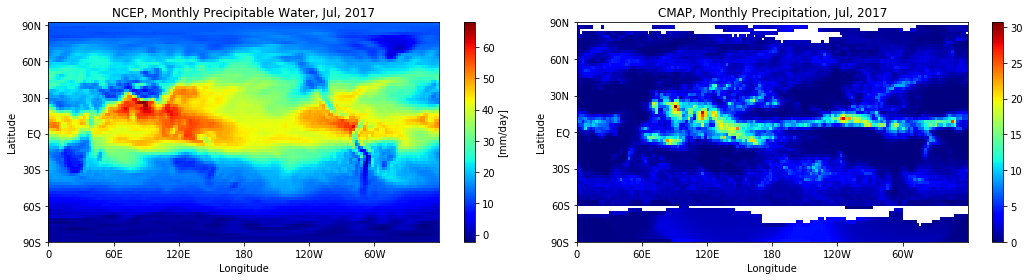

In [611]:
prw_temp=prw[-6,:,:]
precp_temp=precp[-6,:,:]

f, (ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
lev=[0,5,10,15,20,25,30,35,40,45,50,55,60];lev2=[0,1,3,5,10,15,20,25];
h1=ax1.pcolor(np.flipud(prw_tmp),cmap=plt.cm.jet)

ax1.set_xticks(np.arange(0,144,24));
ax1.set_xticklabels(('0', '60E', '120E', '180', '120W','60W','0'))
ax1.set_yticks(np.arange(0,73,12));
ax1.set_yticklabels(('90S','60S','30S','EQ','30N','60N','90N'))
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('NCEP, Monthly Precipitable Water, Jul, 2017')
cbar=f.colorbar(h1,ax=ax1)
cbar.set_label('[mm')

h2=ax2.pcolor(np.flipud(precp_tmp),cmap=plt.cm.jet)
ax2.set_xticks(np.arange(0,144,24))
ax2.set_xticklabels(('0', '60E', '120E', '180', '120W','60W','0'))
ax2.set_yticks(np.arange(0,73,12))
ax2.set_yticklabels(('90S','60S','30S','EQ','30N','60N','90N'));
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('CMAP, Monthly Precipitation, Jul, 2017')
f.colorbar(h2,ax=ax2)
cbar.set_label('[mm/day]')

tight_layout()

### 1. Regression and Correlation Coefficient :
*** 
In tropics, precipitabel water is larger and higher precipitable water is seemly associated with stronger precipitation. An exponential relationship between precipitable water and precipitation has been studied, so let's see how it looks like and whether this relationship still maintains in mid-latitudes.

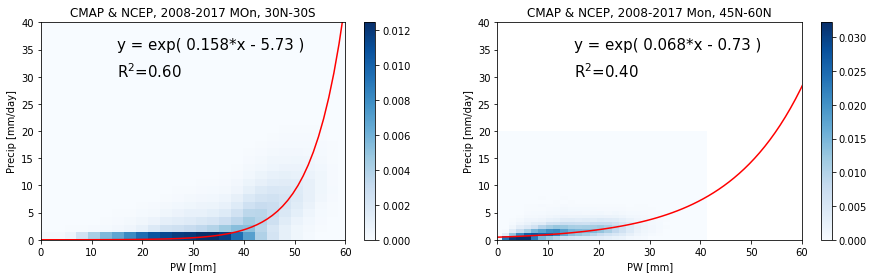

In [612]:
import scipy as sci

prw_re=np.ravel(prw[:,24:48,:]) # tropics 30N-30S
prec_re=np.ravel(precp[:,24:48,:]) 
prw_mi=np.ravel(prw[:,12:18,:]) # mid-latitude 45N-60N
prec_mi=np.ravel(precp[:,12:18,:]) 
re1=sci.stats.linregress(prw_re,np.log(prec_re+10**-5));re2=sci.stats.linregress(prw_mi,np.log(prec_mi+10**-5))

f, (ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
h1=ax1.hist2d(prw_re,prec_re,cmap=plt.cm.Blues,bins=30,cmin=0.,normed=True);
h2=ax2.hist2d(prw_mi,prec_mi,cmap=plt.cm.Blues,bins=30,cmin=0.,normed=True);

fit=np.polyfit(prw_re,np.log(prec_re+10**-5),1);
fit2=np.polyfit(prw_mi,np.log(prec_mi+10**-5),1);

#f.colorbar(h1,cmap=plt.cm.BrBG,fraction=0.05,pad=0.08,ax=ax1)
f.colorbar(h1[3],ax=ax1);f.colorbar(h2[3],ax=ax2,)
ax1.set_label('Fraction')
ax1.set_xlabel("PW [mm]");ax2.set_xlabel('PW [mm]')
ax1.set_ylabel("Precip [mm/day]");ax2.set_ylabel('Precip [mm/day]')
ax1.set_title('CMAP & NCEP, 2008-2017 MOn, 30N-30S');ax2.set_title('CMAP & NCEP, 2008-2017 Mon, 45N-60N')

x = np.linspace(0.1,80,num=80);
y = np.exp(x*fit[0]+fit[1]);y2=np.exp(x*fit2[0]+fit2[1]);
ax1.plot(x,y,'r');ax2.plot(x,y2,'r');
ax1.set_ylim([0,40]);ax2.set_ylim([0,40])
ax1.set_xlim([0,60]);ax2.set_xlim([0,60]);
#plt.text(-150,18,'N =');plt.text(-95,18,numpy.shape(ug_re)[1])
#plt.text(-150,23,'R =');plt.text(-95,23,round(r[1],3))
ax1.text(15,35,'y = exp( 0.158*x - 5.73 )',fontsize=15);ax1.text(15,30,'R$^2$=0.60',fontsize=15)
ax2.text(15,35,'y = exp( 0.068*x - 0.73 )',fontsize=15);ax2.text(15,30,'R$^2$=0.40',fontsize=15)
plt.show()



### 2. Global maps of linear trends over the last 10 yrs - precipitation and precipitable water :
***
After verifying the relationship between precipitable water and precipitation, let's see the tendencies for both vairables over the globe. <br> A linear trend and the corresponding p-value can be easily determined by a linear regression function in scipy.

In [613]:
# calculate the trend since 2008
prw_45=prw[:,18:54,:] # 45N-45S
precp_45=precp[:,18:54,:];
prw_trend=np.zeros([prw_45.shape[1],prw_45.shape[2]]); # container
prw_sig=np.zeros([prw_45.shape[1],prw_45.shape[2]]);
precp_trend=np.zeros([prec_45.shape[1],prec_45.shape[2]]);
precp_sig=np.zeros([prec_45.shape[1],prec_45.shape[2]]);

for i in range(prw_45.shape[2]-1):
    for j in range(prw_45.shape[1]-1):
        prw_trend[j,i]=sci.stats.linregress(np.arange(120),np.squeeze(prw_45[:,j,i]))[0] # pw trend 
        precp_trend[j,i]=sci.stats.linregress(np.arange(120),np.squeeze(precp_45[:,j,i])+10**-5)[0] # precp trend
        prw_sig[j,i]=sci.stats.linregress(np.arange(120),np.squeeze(prw_45[:,j,i]))[3] # p-value
        precp_sig[j,i]=sci.stats.linregress(np.arange(120),np.squeeze(precp_45[:,j,i])+10**-5)[3] # p-value 


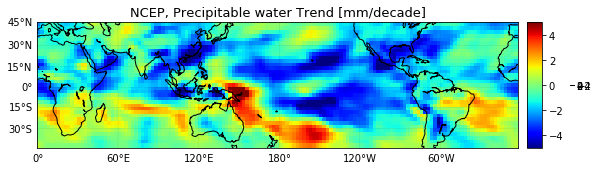

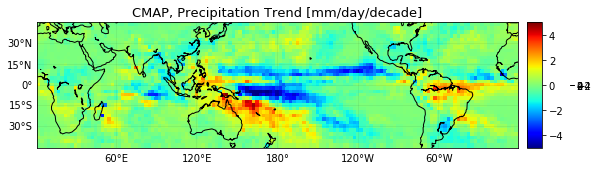

In [614]:
import matplotlib.image as mpimg
#prw_trend=np.flipud(prw_trend); precp_trend=np.flipud(precp_trend)
#prw_sig=np.flipud(prw_sig); precp_sig=np.flipud(precp_sig)

h1=mapplot(-prw_trend*120,lat1[18:54],lon1,'NCEP, Precipitable water Trend [mm/decade]',[-45,46,15])
h1.set_clim([-5,5]);plt.colorbar(fraction=0.046,shrink=0.0001,ticks=None,label='')

h2=mapplot(-precp_trend*120,lat2[18:54],lon2,'CMAP, Precipitation Trend [mm/day/decade]',[-45,46,15])
h2.set_clim([-5,5]);plt.colorbar(fraction=0.046,shrink=0.0001,ticks=None,label='')


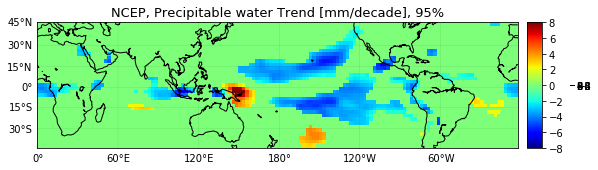

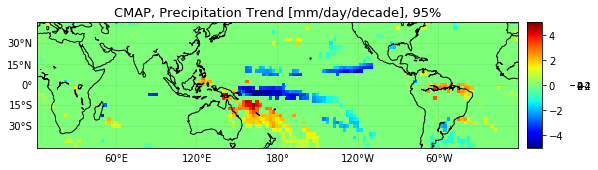

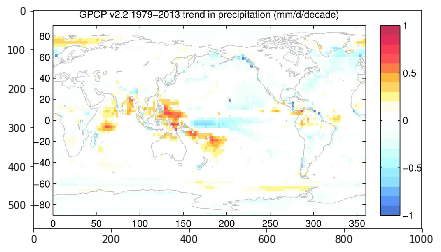

In [615]:
precp_sigtrend=np.zeros([precp_45.shape[1],precp_45.shape[2]])
prw_sigtrend=np.zeros([prw_45.shape[1],prw_45.shape[2]])

for i in range(prw_45.shape[2]-1):
    for j in range(prw_45.shape[1]-1):
        if prw_sig[j,i] < 0.05 :
            prw_sigtrend[j,i]=prw_trend[j,i]
            
for i in range(precp_45.shape[2]-1):
    for j in range(precp_45.shape[1]-1):
        if precp_sig[j,i] < 0.05 :
            precp_sigtrend[j,i]=precp_trend[j,i]

h1=mapplot(-prw_sigtrend*120,lat1[18:54],lon1,'NCEP, Precipitable water Trend [mm/decade], 95%',[-45,46,15])
h1.set_clim([-8,8]);plt.colorbar(fraction=0.046,shrink=0.0001,ticks=None,label='',cmap=plt.cm.RdBu)


h2=mapplot(-precp_sigtrend*120,lat2[18:54],lon2,'CMAP, Precipitation Trend [mm/day/decade], 95%',[-45,46,15])
h2.set_clim([-5,5]);plt.colorbar(fraction=0.046,shrink=0.0001,ticks=None,label='')

plt.figure(figsize=(10,4))
img=mpimg.imread('gpcpv2.2trendmap.jpg')
imgplot = plt.imshow(img)

The trend is higher than another analysis done before by others. Why?
1. Different dataset and analyzed time
2. I forgot to remove the seasonality...
3. Something happened in the regression function

### 3. EOF application to precipitation field over 45S-45N
To understand how many variances of precipitation can be explained by specific modes with different spatial structures, a usful tool for this analysis is the eofs package.<br>


In [616]:
import xarray as xr 
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from eofs.standard import Eof # import standard eofs from python eofs package

dataset=xr.open_dataset('precip.mon.mean.2008_2017.45NS.nc'); # read ncfile 
precp_xr=dataset
solver = Eof(precp_xr.precip.data)

In [617]:
# Retrieve the EOFs and PCs
eofs = solver.eofs()
eigenvalues = solver.eigenvalues()
pcs = solver.pcs()
eofsasCorr = solver.eofsAsCorrelation()
eofsasCov = solver.eofsAsCovariance()

#######################################
explained = eigenvalues/np.sum(eigenvalues); # eigenvalue for calculating the fraction of explained variances
#######################################

print('EOF1= ',explained[0]);print()
print('EOF2= ',explained[1]);print()
print('EOF3= ',explained[2]);print()
print('EOF4= ',explained[3])


EOF1=  0.3259745583513772

EOF2=  0.08583745342300521

EOF3=  0.06349225920743885

EOF4=  0.046152770368554925


In [618]:
def plot_map_ts(xydata,ts,lon,lat,time, label1, label2): 
    fig = plt.figure(figsize=(8, 4))

    ax = fig.add_subplot(121, projection=ccrs.PlateCarree())
    cmap = contourf(lon, lat, xydata, 23, 
                 transform=ccrs.PlateCarree(), 
                 cmap='seismic')
    plt.colorbar(cmap, orientation='horizontal')
    ax.add_feature(cfeat.COASTLINE)
    ax.set_title(label1)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(time, ts) 
    ax2.set_title(label2)

0.013888772612476072
0.013885012776020597
0.013885005537629929
0.013887106277835121


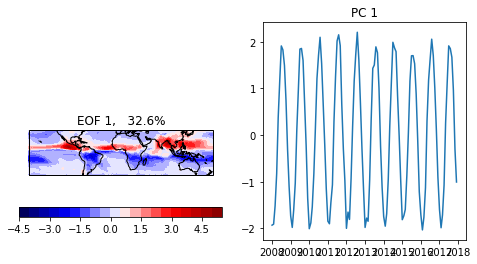

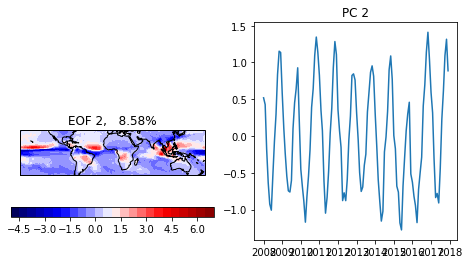

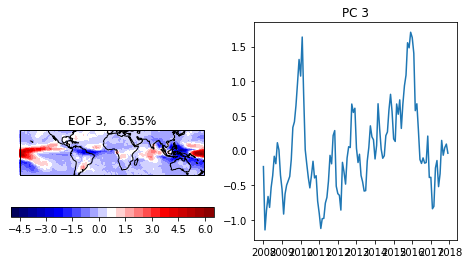

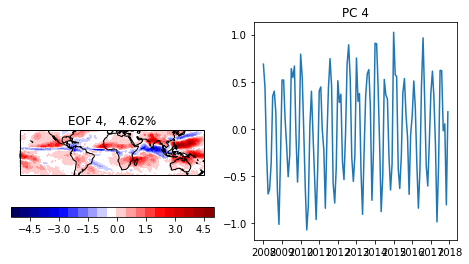

In [619]:
# Put all the magnitude info into the PC for clarity of plotting
for MODE in [0,1,2,3]:
    xystd = np.std(eofs[MODE,:,:].ravel())
    print(xystd)
    plot_map_ts(eofs[MODE,:,:]/xystd, pcs[:,MODE]*xystd,
                                 precp_xr.lon,
                                 precp_xr.lat,
                                 precp_xr.time,
            'EOF '+str(MODE+1)+',   '+str(np.format_float_positional(explained[MODE]*100,2))+'%', 'PC '+str(MODE+1))

(a). EOF1, accounting for 32.6% total varainces, shows a N-S spatial structure symmetric to the equator --> The first      Mode indicates the shifting of ICTZ with a clear annual cycle seen in PC1. <br>

(b). PC2 illustrates a annual cycle as well, and large variances locate in Asian and Africa --> Monsoon systems <br>

(c). EOF3 shows large varainces over the equator, especailly for the central Pacific and the western Pacific,and a strong signal occurs in 2015 --> El Niño 

### 4. Play around the amazing FFT : applying FFT to audio files
In the class, FFT is used as a tool to convert signals of the temporal domain into a frequency domain, which returns resolved frequencies and corresponding powers (variances) in a power spectrum. Beyond this applicaiton, FFT can be  

In [620]:
from scipy.io import wavfile
fs, data = wavfile.read('/Users/willytsai/Downloads/01_happy_birthday_song.wav') # read audio file .wav 

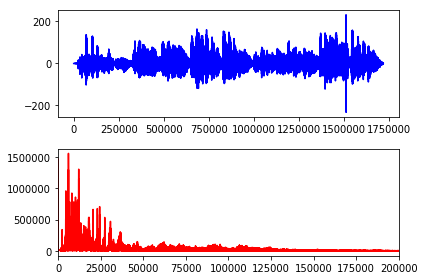

In [621]:
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = round(len(c)/2)  # you only need half of the fft list (real signal symmetry)

plt.subplot(211)
plt.plot(b,'b')

plt.subplot(212)
plt.plot(abs(c[:(d-1)]),'r')
plt.xlim([0,200000])
tight_layout()
plt.show()

### I was trying to apply some filters to it by truncating frequencies and then recontruct the signals to a new audio file, so we can have a  "Special" happy birthday song created by the "Spectral" analysis which can be played in this notebook. But...it's much more complicated! Maybe someday.

## 5. Presentation of Learning
### - Learning a new, powerful, and visualized software is great, but also frustrated and confusing at the beginning:  compatibilities between packages are annoying! 
### - Getting more familiar with regression, EOF, and FFT. Applying these statistics to photos or vedios is really amusing and impressive.
### - BIG DATA! Tons of materials, scripts, and package for data analysis on Github, and you can reach it and get your result immediately given the input data. 
### - The importance of version control and the power of Github













